# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_r = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_r["coord"]["lat"]
        city_lng = city_r["coord"]["lon"]
        city_max_temp = city_r["main"]["temp_max"]
        city_humidity = city_r["main"]["humidity"]
        city_clouds = city_r["clouds"]["all"]
        city_wind = city_r["wind"]["speed"]
        city_country = city_r["sys"]["country"]
        city_date = city_r["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sangar
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | olafsvik
Processing Record 10 of Set 1 | monrovia
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | alcaniz
Processing Record 15 of Set 1 | turukhansk
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | rutland
Processing Record 18 of Set 1 | hauterive
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | kodiak
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sangar,63.9242,127.4739,-15.42,90,100,2.72,RU,1667064348
1,torbay,47.6666,-52.7314,11.82,59,20,10.29,CA,1667064348
2,port alfred,-33.5906,26.8910,21.23,85,99,6.59,ZA,1667064348
3,hobart,-42.8794,147.3294,6.92,82,100,2.06,AU,1667064349
4,chokurdakh,70.6333,147.9167,-14.88,96,100,3.39,RU,1667064349


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sangar,63.9242,127.4739,-15.42,90,100,2.72,RU,1667064348
1,torbay,47.6666,-52.7314,11.82,59,20,10.29,CA,1667064348
2,port alfred,-33.5906,26.8910,21.23,85,99,6.59,ZA,1667064348
3,hobart,-42.8794,147.3294,6.92,82,100,2.06,AU,1667064349
4,chokurdakh,70.6333,147.9167,-14.88,96,100,3.39,RU,1667064349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

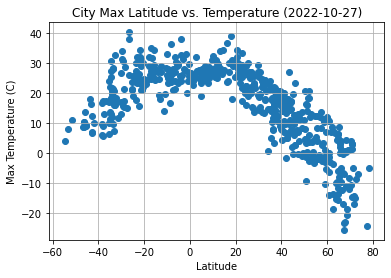

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Temperature (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

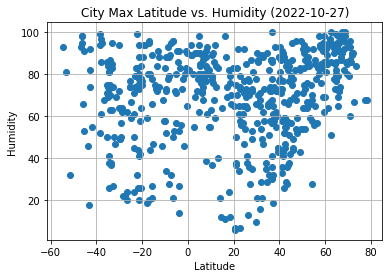

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Humidity (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

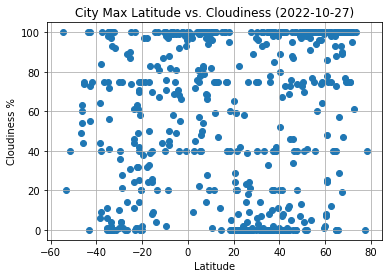

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Cloudiness (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

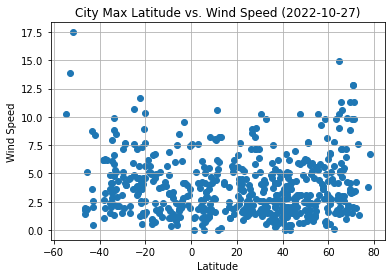

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Wind Speed (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def Linear_Regression_Plots(x,y):
    slope, intercept, r, p, stderr = linregress(x,y)

    plt.plot(x, x * slope + intercept, color="r")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.legend([line_eq], labelcolor='r')

    # Print r value
    print(f"The r-value is: {r*r}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sangar,63.9242,127.4739,-15.42,90,100,2.72,RU,1667064348
1,torbay,47.6666,-52.7314,11.82,59,20,10.29,CA,1667064348
4,chokurdakh,70.6333,147.9167,-14.88,96,100,3.39,RU,1667064349
5,guerrero negro,27.9769,-114.0611,22.70,53,0,4.84,MX,1667064197
7,olafsvik,64.8945,-23.7142,6.40,91,88,5.00,IS,1667064166


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,21.23,85,99,6.59,ZA,1667064348
3,hobart,-42.8794,147.3294,6.92,82,100,2.06,AU,1667064349
6,east london,-33.0153,27.9116,20.52,83,0,5.14,ZA,1667064350
9,ushuaia,-54.8000,-68.3000,3.81,93,100,10.29,AR,1667064252
11,carnarvon,-24.8667,113.6333,18.95,67,74,10.72,AU,1667064351


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.738742934724389


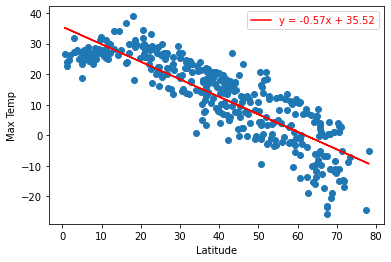

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values)

plt.show()


The r-value is: 0.4193975118375564


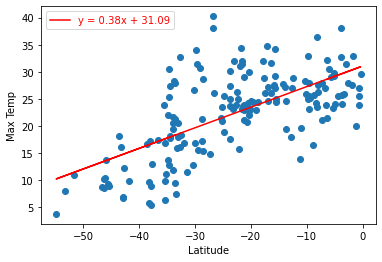

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** 
Within the Nothern Hemisphere, the data is showing a strong relationshiop between Latitude and Temperature.  Generally, the higher the latitude the lower the max temperature.  

The Southern Hemisphere's relationship is opposite of Northern's, however, it's not as consistent given the r-value is .419 vs Northern's .739.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05946253634617955


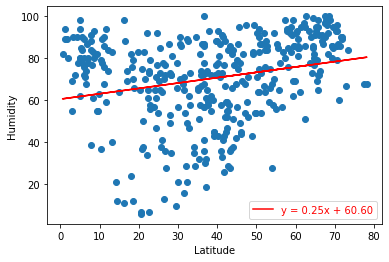

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.0006659132602048537


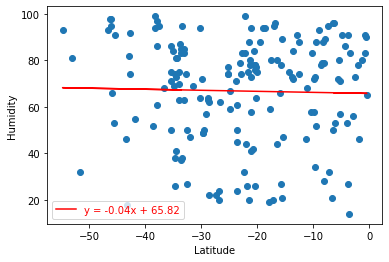

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** 
The linear regression line between Latitude and Humidity shows no relationship on Northern nor Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03501423001257512


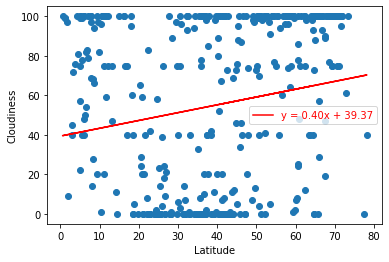

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.04191359269939031


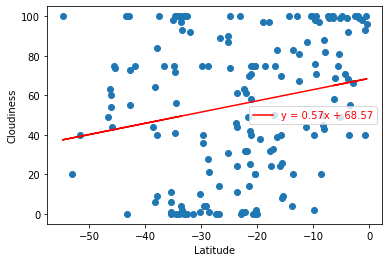

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:**
The linear regression line between Latitude and Cloudiness shows no relationship on Northern nor Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.026913397986574338


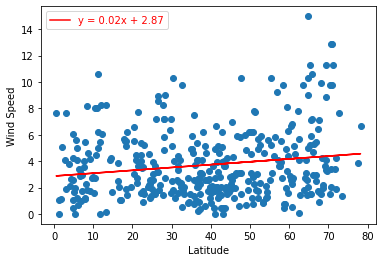

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.05443972867745715


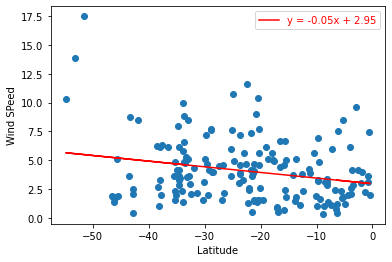

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind SPeed")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** 
The linear regression line between Latitude and Wind Speed shows no relationship on Northern nor Southern Hemisphere.